# Internal penalties demo
## Load high resolution grid

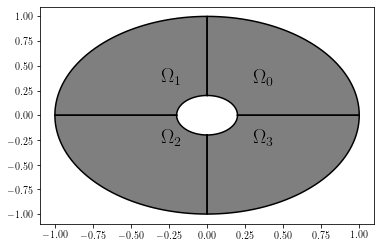

In [1]:
import sys
sys.path.append('..')

from sbpy import utils
from sbpy import grid2d

N = 81
highres_blocks = utils.get_annulus_grid(N)
highres_grid = grid2d.MultiblockSBP(highres_blocks)
highres_grid.plot_domain()

## Load high res solution

<class 'numpy.ndarray'>


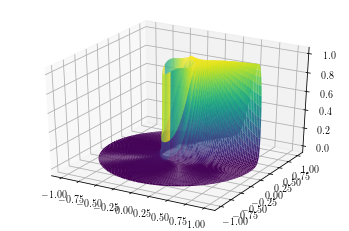

In [2]:
import pickle
with open('highres_sol.pkl', 'rb') as f:
    U_highres, = pickle.load(f)
    
print(type(U_highres[0]))

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

for (X,Y),Z in zip(highres_blocks, U_highres):
    ax.plot_surface(X,Y,Z,cmap='viridis')
    
plt.show()

## Load low resolution grid

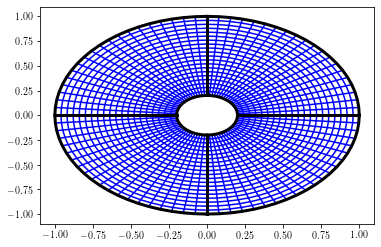

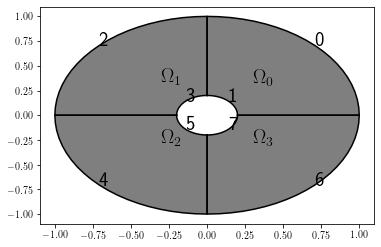

In [11]:
N = 21
lowres_blocks = utils.get_annulus_grid(N)
lowres_grid = grid2d.MultiblockSBP(lowres_blocks, accuracy=4)
lowres_grid.plot_grid()
lowres_grid.plot_domain(boundary_indices=True)

## Let's run a simulation with no internal penalties

In [13]:
import numpy as np
from sbpy import multiblock_solvers

vel = np.array([1,1])/np.sqrt(2)
diff = 0.01

def g(t,x,y):
    return 1

solver = multiblock_solvers.AdvectionDiffusionSolver(lowres_grid, velocity=vel, diffusion=diff)

solver.set_boundary_condition(1,{'type': 'dirichlet', 'data': g})
solver.set_boundary_condition(3,{'type': 'dirichlet', 'data': g})
solver.set_boundary_condition(5,{'type': 'dirichlet', 'data': g})
solver.set_boundary_condition(7,{'type': 'dirichlet', 'data': g})

tspan = (0.0, 3.5)

solver.solve(tspan)



  0%|          | 0/100 [00:00<?, ?it/s]

  2%|▏         | 2/100 [00:00<00:31,  3.10it/s]

  3%|▎         | 3/100 [00:00<00:31,  3.11it/s]

  4%|▍         | 4/100 [00:01<00:29,  3.25it/s]

  5%|▌         | 5/100 [00:01<00:27,  3.45it/s]

  6%|▌         | 6/100 [00:01<00:25,  3.67it/s]

  7%|▋         | 7/100 [00:01<00:24,  3.77it/s]

  8%|▊         | 8/100 [00:02<00:23,  3.93it/s]

  9%|▉         | 9/100 [00:02<00:22,  4.06it/s]

 10%|█         | 10/100 [00:02<00:21,  4.20it/s]

 11%|█         | 11/100 [00:02<00:20,  4.34it/s]

 12%|█▏        | 12/100 [00:02<00:19,  4.46it/s]

 13%|█▎        | 13/100 [00:02<00:18,  4.60it/s]

 14%|█▍        | 14/100 [00:02<00:18,  4.71it/s]

 15%|█▌        | 15/100 [00:03<00:17,  4.85it/s]

 16%|█▌        | 16/100 [00:03<00:16,  4.98it/s]

 17%|█▋        | 17/100 [00:03<00:16,  5.09it/s]

 18%|█▊        | 18/100 [00:03<00:15,  5.19it/s]

 19%|█▉        | 19/100 [00:03<00:15,  5.28it/s]

 20%|██        | 20/100 [00:03<00:14,  5.39it/s]

 21%|██        

In [14]:
from sbpy import animation
U = []
for frame in np.transpose(solver.sol.y):
    U.append(grid2d.array_to_multiblock(lowres_grid, frame))
    
animation.animate_multiblock(lowres_grid, U)

In [ ]:
bd_layer_size = 5
internal_nodes = utils.boundary_layer_selection(lowres_grid, [1,3,5,7], bd_layer_size)
int_data, int_idx = utils.fetch_highres_data(lowres_grid, nodes, highres_grid, )

solver = multiblock_solvers.AdvectionDiffusionSolver(lowres_grid, velocity=vel, diffusion=diff,
                                                    )

solver.set_boundary_condition(1,{'type': 'dirichlet', 'data': g})
solver.set_boundary_condition(3,{'type': 'dirichlet', 'data': g})
solver.set_boundary_condition(5,{'type': 'dirichlet', 'data': g})
solver.set_boundary_condition(7,{'type': 'dirichlet', 'data': g})

tspan = (0.0, 3.5)

solver.solve(tspan)